<a href="https://www.kaggle.com/code/aveocr/hackatone?scriptVersionId=109504292" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hackprivate/dataset_train.xlsx


In [2]:
helth_ai = pd.read_excel("/kaggle/input/hackprivate/dataset_train.xlsx")

In [3]:
def metrics_test(predict, target):
    _sum = 0
    assert len(predict) == len(target) 
    for i in range(0, len(predict)):
        _sum += abs(predict[i] - target[i])
    return 1 - _sum / len(predict)

metrics_test([1, 2, 1, 1, 0, 1, 0], [1, 2, 1, 0, 0, 1, 0])

0.8571428571428572

In [4]:
helth_ai.isna().sum()

Obfuscated name    0
Test_index         0
Presentation       0
Question           0
Data               0
Class_label_FPG    0
dtype: int64

In [5]:
helth_ai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28713 entries, 0 to 28712
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Obfuscated name  28713 non-null  object
 1   Test_index       28713 non-null  int64 
 2   Presentation     28713 non-null  int64 
 3   Question         28713 non-null  int64 
 4   Data             28713 non-null  object
 5   Class_label_FPG  28713 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.3+ MB


In [6]:
len(helth_ai["Obfuscated name"].unique())

472

In [7]:
helth_ai.shape # размерность

(28713, 6)

In [8]:
helth_ai.groupby(["Obfuscated name"])["Test_index"].value_counts()

Obfuscated name                       Test_index
001945e6-1756-4745-bd86-c016f6ba6e6b  3             31
                                      2             29
00796a7d-8ad9-4a81-802a-ab11ca9cc1c5  1             29
                                      2             27
00a34d2d-6fd9-4f64-895c-bc64383725ba  1             32
                                                    ..
fd0e5935-96b2-4ce3-a4d7-63c476cd1a68  3             30
                                      2             29
fd520e09-6236-4999-aa04-f03e59901884  3             29
fd8c5c4a-aa01-4027-b2c1-6c0b07ce1936  3             31
                                      2             27
Name: Test_index, Length: 980, dtype: int64

In [9]:
helth_ai.groupby(["Question"])["Presentation"].value_counts()

Question  Presentation
1         1               758
          2               736
          3               723
          4                 1
2         3               818
          2               816
          1               809
          4                 2
3         1               819
          3               817
          2               801
          4                 1
4         3               839
          1               832
          2               804
          4                 2
5         1               831
          2               811
          3               797
          4                 2
6         2               819
          3               814
          1               803
          4                 2
7         1               835
          3               831
          2               812
          4                 3
8         2               800
          3               790
          1               788
          4                 2
9         1      

In [10]:
helth_ai

,Obfuscated name,Test_index,Presentation,Question,Data,Class_label_FPG
0,c6c1c29d-0331-46e7-966b-808d34cca6ee,3,2,10,"[-24, 51, 75, 51, 14, -13, -25, -45, -77, -76,...",1
1,0fbd87a7-f107-4e0f-aef2-a14ecfe658e6,2,1,11,"[-305, -320, -278, -267, -308, -375, -467, -53...",1
2,23a36ef6-45be-4ed9-9c4d-0169283054b5,2,2,6,"[60, 37, 39, 69, 60, 30, -7, -37, -60, -71, -8...",1
3,c5ba273c-c85e-4ab0-94a8-647f4589989d,1,3,7,"[65, 48, 30, 18, 9, 0, -18, -35, -1, 83, 119, ...",1
4,c291a7ab-817d-497d-8cfe-86df504a665f,4,1,4,"[116, 95, 80, 78, 78, 73, 63, 47, 45, 94, 119,...",1
...,...,...,...,...,...,...
28708,a19bc5c7-fa40-428e-af9c-e097a7cc49e2,3,3,11,"[329, 299, 245, 209, 162, 94, 28, -18, -71, -1...",0
28709,d558496c-675a-416e-95ff-1be2fc0a594a,3,2,11,"[-321, -318, -264, -211, -184, -168, -139, -98...",1
28710,21e1a963-4ea8-4713-8bfe-d006707e4b5c,2,3,5,"[-184, -261, -333, -424, -405, -54, 314, 593, ...",1
28711,7823acde-5e7f-446b-a157-119e04eca46b,3,3,2,"[106, 125, 112, 96, 93, 92, 85, 73, 60, 49, 55...",2


In [11]:
helth_ai.sort_values(["Obfuscated name","Question", "Test_index", ])[:10]

,Obfuscated name,Test_index,Presentation,Question,Data,Class_label_FPG
840,001945e6-1756-4745-bd86-c016f6ba6e6b,3,2,1,"[52, -52, 18, 283, 618, 788, 807, 724, 609, 53...",2
6365,001945e6-1756-4745-bd86-c016f6ba6e6b,3,3,1,"[-186, -229, -19, 183, 316, 357, 334, 305, 296...",0
17708,001945e6-1756-4745-bd86-c016f6ba6e6b,3,1,1,"[41, 30, 28, 25, -20, -71, -112, -156, -179, -...",0
1795,001945e6-1756-4745-bd86-c016f6ba6e6b,2,3,2,"[174, 92, 68, 221, 505, 823, 872, 810, 738, 67...",2
4898,001945e6-1756-4745-bd86-c016f6ba6e6b,2,2,2,"[-69, -142, -148, -132, -142, -187, -210, -4, ...",2
22077,001945e6-1756-4745-bd86-c016f6ba6e6b,2,1,2,"[1336, 1247, 1172, 1110, 1010, 871, 703, 557, ...",2
11650,001945e6-1756-4745-bd86-c016f6ba6e6b,3,3,2,"[-530, -609, -659, -728, -780, -814, -746, -49...",0
18597,001945e6-1756-4745-bd86-c016f6ba6e6b,3,2,2,"[229, 221, 454, 812, 956, 971, 886, 793, 749, ...",1
27320,001945e6-1756-4745-bd86-c016f6ba6e6b,3,1,2,"[-254, -162, 184, 351, 406, 391, 359, 345, 330...",2
18544,001945e6-1756-4745-bd86-c016f6ba6e6b,2,3,3,"[-433, -475, -479, -394, -168, -25, 42, 14, -1...",0


In [12]:
helth_ai['Data'] = helth_ai['Data'].str.strip('[]')
freq = helth_ai['Data'].str.split(", ",expand=True).astype(int)

In [13]:
cat_cols = ['Test_index', 'Presentation', 'Question']
target_cols = ['Class_label_FPG']

freq[cat_cols + target_cols + ["Obfuscated name"]] = helth_ai[cat_cols + target_cols + ["Obfuscated name"]]

In [14]:
freq

,0,1,2,3,4,5,6,7,8,9,...,235,236,237,238,239,Test_index,Presentation,Question,Class_label_FPG,Obfuscated name
0,-24,51,75,51,14,-13,-25,-45,-77,-76,...,-135,-138,-92,-43,-14,3,2,10,1,c6c1c29d-0331-46e7-966b-808d34cca6ee
1,-305,-320,-278,-267,-308,-375,-467,-531,-439,-186,...,-30,-137,-170,-130,-100,2,1,11,1,0fbd87a7-f107-4e0f-aef2-a14ecfe658e6
2,60,37,39,69,60,30,-7,-37,-60,-71,...,24,-21,-60,-88,-113,2,2,6,1,23a36ef6-45be-4ed9-9c4d-0169283054b5
3,65,48,30,18,9,0,-18,-35,-1,83,...,-145,-170,-189,-171,-98,1,3,7,1,c5ba273c-c85e-4ab0-94a8-647f4589989d
4,116,95,80,78,78,73,63,47,45,94,...,-126,-127,-128,-136,-149,4,1,4,1,c291a7ab-817d-497d-8cfe-86df504a665f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28708,329,299,245,209,162,94,28,-18,-71,-115,...,315,298,258,172,122,3,3,11,0,a19bc5c7-fa40-428e-af9c-e097a7cc49e2
28709,-321,-318,-264,-211,-184,-168,-139,-98,-97,-232,...,348,351,404,455,477,3,2,11,1,d558496c-675a-416e-95ff-1be2fc0a594a
28710,-184,-261,-333,-424,-405,-54,314,593,622,537,...,-327,-355,-388,-420,-381,2,3,5,1,21e1a963-4ea8-4713-8bfe-d006707e4b5c
28711,106,125,112,96,93,92,85,73,60,49,...,-164,-169,-176,-180,-180,3,3,2,2,7823acde-5e7f-446b-a157-119e04eca46b


# Информация по столбцам

0-239 - **Частота** 

240 - **Test_index**

241 - **Presentation**

242 - **Question**

243 - **Class_label_FPG**

244 - **Obfuscated name**

In [15]:
"""
    index - номер строки, в которой надо получить значение частот 
    dataframe - датафрейм, в котором мы будем все искать
"""
def time_row(index: int, dataframe):
    return dataframe.iloc[index, 0:239]
"""

    index - номер строки, где надо запросить результат
    dataframe - датафрейм, в котором все ищем 
"""
def target_value(index: int, dataframe):
    return dataframe.iloc[index, 243]

In [16]:
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.signal import argrelextrema

Посмотрим как человек ведет себя не в зависимости от группы и как меняется его польс 

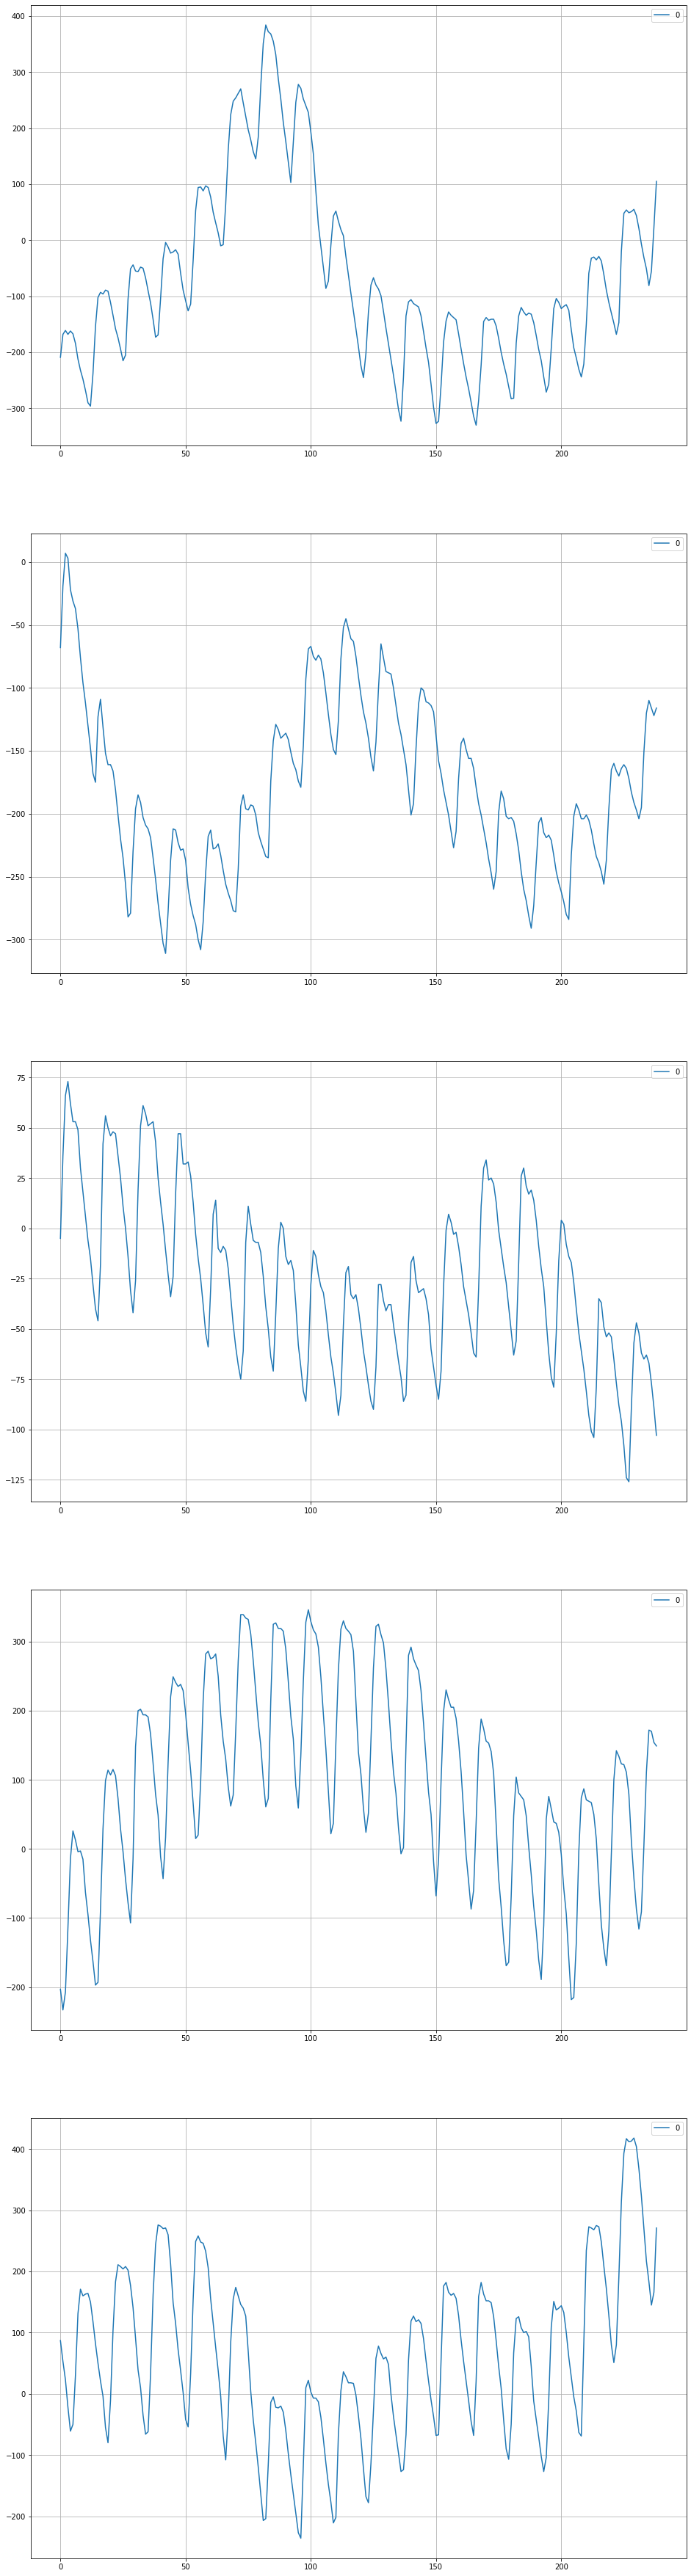

In [17]:
one_users = freq[freq["Obfuscated name"]=='15f63893-98cd-4c77-8ae7-8eadd9f7db32'].sort_values(["Test_index"])

zeroes = one_users[one_users["Class_label_FPG"]==0]
ones = one_users[one_users["Class_label_FPG"]==1]
two = one_users[one_users["Class_label_FPG"]==2]


fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(16, 64))
for i in range(5):
    frequency = time_row(i, zeroes)
    ax[i].plot(frequency, label=target_value(i, zeroes))

    ax[i].legend()
    ax[i].grid()

In [18]:
def steps(step, datasets=list):
    for i in range(step, 251, step):
        print(i-step, " - ", i, ":", np.array(datasets[i-50:i]).std(), end="\n")

# Вычислим новые признаки

In [19]:
# """
# maxim - индексы максимум функции
# minim - индексы минимум функции
# frequence - массив numpy.ndarray, который содержит частот
# frequence_heart - частота сердее биения, от неё зависит количество экстремумов
# """

def get_extremum(points = list()) -> tuple:
    points = np.array(points)
    return argrelextrema(points, np.greater)[0], argrelextrema(points, np.less)[0]


""" Вычисляем разница между наибольшим и наименьшим максимум """
def delta_max(maxim, frequence):
    return abs(max(frequence[maxim]) - min(frequence[maxim]))


"""
arr - массив, для которого нужно посчитать локальные амплитуды
Возвращает: список кортежей, где 1ое значение - индекс экстремума,
2ое - амплитуда от данного экстремума до следующего
"""
"""
arr - исходных массив, для которого нужно найти точки экстремума
Возвращает массив индексов точек экстремума
"""
def find_extremum(arr):
    return np.sort(np.append(
    argrelextrema(arr, np.greater),
    argrelextrema(arr, np.less)
  ))

"""
arr - исходный массив, для которого нужно найти локальные амплитуды
"""
def find_amplitudes(arr):
    raw = np.abs(np.diff(
    np.take(arr, find_extremum(arr))
  ))
    max_ampl = np.max(raw)
    return raw[raw > max_ampl * 0.15]
"""
arr - исходный массив, для которого нужно найти среднюю частоту сигнала
"""
def find_frequency(arr):
    difs = np.diff(find_extremum(arr))
    return len(difs) / np.sum(difs)

"""
arr - исходный массив, для которого нужно найти минимум и максимум
Возвращает: кортеж, где первый элемент - минимум, второй - максимум
"""
def find_min_max(arr):
    return (np.min(arr), np.max(arr))


In [20]:
find_extremum(freq.iloc[i, 0:240].values)

array([  8,  10,  18,  21,  28,  31,  39,  42,  49,  53,  60,  63,  71,
        74,  77,  78,  81,  84,  88,  89,  91,  94,  98,  99, 101, 105,
       108, 109, 112, 115, 123, 125, 128, 130, 133, 136, 139, 140, 144,
       147, 149, 157, 165, 168, 171, 172, 179, 186, 189, 197, 200, 208,
       211, 218, 221, 229, 232])

Напишим функции для вычисления фич

In [21]:
""" 
df - DataFrame
size - 

"""
# получаем фичу по работе с разноность между наибольшим и наименьшьим значением максимума
def get_one_feature(df, size):
    delta = []
    for i in range(size):
        maxim, minim = get_extremum(df.iloc[i, 0:240].values)
        delta.append(delta_max(maxim, df.iloc[i, 0:240].values))
    return np.array(delta) 

# получаем фичу по работе с частотой сердцебиения
def get_two_feature(df, size):
    values = [] 
    for i in range(size):
        values.append(find_frequency(df.iloc[i, 0:240].values))
    return np.array(values)
# Получаем фичу п вычислинию наименьшей амплитуды
def get_three_feature(df, size):
    min_values = []
    for i in range(size):
        min_values.append(min(find_amplitudes(freq.iloc[i, 0:240].values)))
    return np.array(min_values)
                          
# freq.iloc[:, 0:239].apply(get_one_feature)

# get_one_feature(freq.iloc[10])

Добавляем эти фичи в dataframe

In [22]:
%time
freq["delta"] = get_one_feature(freq, freq.shape[0])

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs


In [23]:
%time
freq["freq"] = get_two_feature(freq, freq.shape[0])

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


In [24]:
%time 
freq["Min amplitude"] = get_three_feature(freq, freq.shape[0])

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs


Визуализируем разность 

[-204, 198]


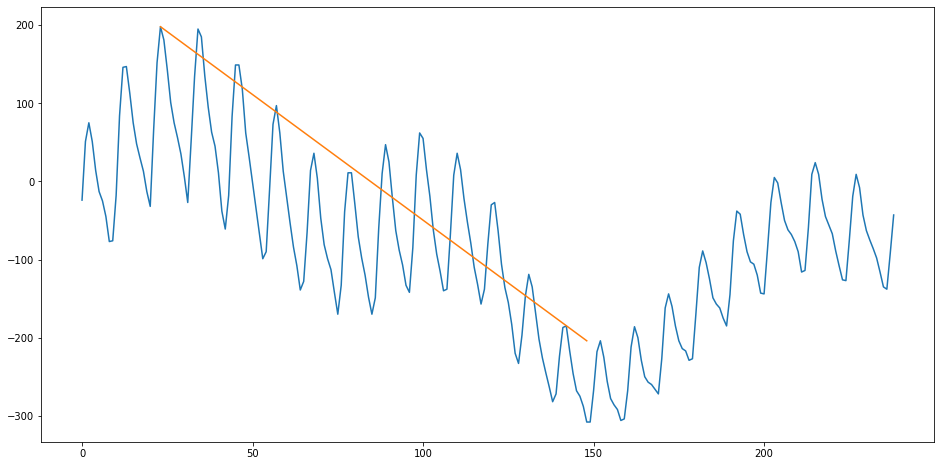

In [25]:
fig, ax = plt.subplots(figsize=(16, 8))

maxim, minim = get_extremum(freq.iloc[0, 0:239].values)

max_value = max(freq.iloc[0, :240][maxim])
min_value = min(freq.iloc[0, :240][maxim])

ax.plot(freq.iloc[0, 0:239])
ax.plot([np.array(freq.iloc[0, :240]).argmax(), np.array(freq.iloc[0, :240]).argmin()], [max_value, min_value])


print([min_value, max_value])

# Используем CatBoost

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import *
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.gaussian_process import GaussianProcessClassifier
import catboost

# Напишем функцию, которая будет разбивать наши данные на тестовые и тренировочные 

In [27]:
def train_test_split_people(X, column_y : str, column_x, test_size: float):
    
    """ X - это данные, которые мы получаем и на которых будет строиться прогноз. Фичи
    column_Y - target значения 
    test_size - какая часть людей от X, Y пойдет на обучение. [0, 1]
    """
    import random
    users = X["Obfuscated name"].unique()
    random.shuffle(users)
    
    train_users_X = pd.DataFrame()
    train_users_y = []
    
    train_size = round(len(users)*(1-test_size))
    # разбиение на пользователей для тренировки модели
    for i in range(train_size):
        train_users_X = train_users_X.append(X[X["Obfuscated name"] == users[i]][column_x])
        train_users_y += (X[X["Obfuscated name"] == users[i]][column_y].to_list())
        
    test_users_X = pd.DataFrame()
    test_users_y = []
    
    # разбиение на пользователей для проверки модели 
    for i in range(train_size, len(users)):
        test_users_X = test_users_X.append(X[X["Obfuscated name"] == users[i]][column_x])
        test_users_y += (X[X["Obfuscated name"] == users[i]][column_y].to_list())
    return train_users_X, test_users_X, train_users_y, test_users_y

In [28]:
train_column = ["delta", "freq", "Min amplitude"] # Фичи, которые мы вычисляли 

In [29]:
# Функция нормирования. приводит все к одному диапазону
def normalize_our(arr):
    diff = arr - np.min(arr)
    diff = np.divide(diff, np.max(diff))
    return diff


In [30]:
freq[["Class_label_FPG"] + train_column].iloc[:100].agg(normalize_our).corr().style.background_gradient(cmap="coolwarm")

,Class_label_FPG,delta,freq,Min amplitude
Class_label_FPG,1.000000,0.062606,0.131526,-0.248992
delta,0.062606,1.000000,-0.020466,0.553276
freq,0.131526,-0.020466,1.000000,-0.158526
Min amplitude,-0.248992,0.553276,-0.158526,1.000000


Вычисленные фичи очень слабо коррелируют между собой. 

<AxesSubplot:>

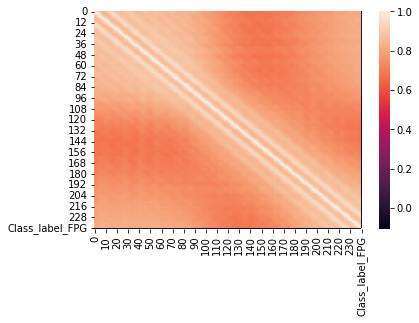

In [31]:
sns.heatmap(freq[[x for x in range(240)] + ["Class_label_FPG"]].corr(),linecolor='white')

Мы можем заметить, что значения чистот очень хорошо коррелируют между собой. Это значит, что они зависит друг от друга

In [32]:
train_X, test_X, train_y, test_y = train_test_split_people(freq[[x for x in range(240)] + ["Class_label_FPG", "Obfuscated name"]], "Class_label_FPG", [x for x in range(240)], 0.33)

Выполним нормирование для train_X, test_X

In [33]:
train_X = train_X.agg(normalize_our)
test_X = test_X.agg(normalize_our)

# Используем CatBoostClassifier

In [34]:
cat = catboost.CatBoostClassifier(
        iterations=100,
        logging_level="Silent",
        grow_policy="Lossguide",
        metric_period=1000,
        random_seed=10,
        task_type="GPU") 


PARAMS = {
#     "n_estimators": np.arange(10, 150, 10),
    "learning_rate": [0.003], #np.arange(0.001, 0.2, 0.001),
    "max_depth": [5], #np.arange(1, 5),
    "l2_leaf_reg": [4],
#     "subsample": [0.6],
#     "random_strength": [5],  
#     "min_data_in_leaf": [100], 
}

cat.grid_search(PARAMS, train_X, train_y, cv=5, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 1.0441258	best: 1.0441258 (0)	total: 9.73s	remaining: 0us
Estimating final quality...


{'params': {'depth': 5, 'l2_leaf_reg': 4, 'learning_rate': 0.003},
 'cv_results': defaultdict(list,
             {'iterations': [0, 99],
              'test-MultiClass-mean': [1.0979316877431238, 1.0456869495920593],
              'test-MultiClass-std': [1.0779298433377802e-05,
               0.0007277773544247896],
              'train-MultiClass-mean': [1.097873103781136, 1.040004353933625],
              'train-MultiClass-std': [1.1517923868027924e-05,
               0.0003271377761850535]})}

In [35]:
# Смотрим точность
print(metrics_test(cat.predict(test_X), test_y))
# print(cat.best)

[0.13121591]


# Используем логистическую регрессию

In [36]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import make_pipeline, Pipeline
# from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import GridSearchCV
# params = {
#     "model__C": [15], #np.arange(0, 50),
# }

# clf = Pipeline(steps=[
#     ("scaler", StandardScaler()),
#     ("model", LogisticRegression(penalty="l1", solver="saga", max_iter=400, random_state=42)),
# ])

# grid_search = GridSearchCV(
#     estimator=clf,
#     param_grid=params,
#     scoring="roc_auc",
#     n_jobs=-1,
#     cv=10,
#     refit=True,
#     verbose=2
# )

# logreg = grid_search.fit(train_X, train_y)

In [37]:
# print(f"best score: {logreg.best_score_}")
# print(f"best params: {logreg.best_params_}")
# print(print(metrics_test(logreg.predict(test_X), test_y)))

# Используем KNeighborsClassifier

In [38]:
# from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier()

# params = {
#     "model__n_neighbors": np.arane(50),
# #     "model__metric": ["manhattan"], #
# }

# grid_search_2 = GridSearchCV(
#     estimator=knn,
#     param_grid=params,
#     scoring="roc_auc",
#     n_jobs=-1,
#     cv=10,
#     refit=True,
#     verbose=2
# )

# knn_pred = grid_search_2.fit(train_X, train_y)

# print(f"best score: {knn_pred.best_score_}")
# print(f"best params: {knn_pred.best_params_}")
# print(metrics_test(knn_pred.predict(test_X), test_y))

In [39]:
# Найдем разность между ближайший элементов

# def delta_between_two_points(column):
#     delta = []
#     for i in range(1, 240):
#         delta += [abs(column[i-1]-column[i])]
#     return delta

# delta_between_two_points([0.4, 0.5, 0.2, 0.4])

In [40]:
# from sklearn.metrics import roc_auc_score

# # roc_auc_score(test_y, model.predict(test_X), multi_class='ovr')
# model.score(test_y, model.predict(test_X))

In [41]:
# metrics_test(model.predict(test_X), normalize_our(test_y))

In [42]:

# fdr = Pipeline(steps=[
#     ("feature", SelectFdr()),
#     ("randomForest", RandomForestClassifier(max_depth=30)) 
# ])



In [43]:
# fdr.fit(train_X, train_y)

In [44]:
# roc_auc_score(test_y, fdr.predict(test_X))

In [45]:
# metrics_test(fdr.predict(test_X), test_y)

In [46]:
# %time

# for feature in get_feature:
#     for classifier in classifiers:
#         fdr = Pipeline(steps=[
#             feature,
#             classifier
#         ])
        
#         fdr.fit(train_X, np.ravel(train_y))
#         print(fdr, metrics_test(fdr.predict(test_X), np.ravel(test_y)) )

Тестовая гипотеза

In [47]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.datasets import make_moons, make_circles, make_classification
# from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.gaussian_process.kernels import RBF
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# names = [
#     "Nearest Neighbors",
#     "Linear SVM",
#     "RBF SVM",
#     "Gaussian Process",
#     "Decision Tree",
#     "Random Forest",
#     "Neural Net",
#     "AdaBoost",
#     "Naive Bayes",
#     "QDA",
# ]

# classifiers = [
#     KNeighborsClassifier(5),
#     SVC(kernel="linear", C=0.025),
#     SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
#     DecisionTreeClassifier(max_depth=5),
#     RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
#     MLPClassifier(alpha=1, max_iter=1000),
#     AdaBoostClassifier(),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis(),
# ]



# # iterate over datasets
# for name, clf in zip(names, classifiers):
#     clf.fit(train_X, train_y)
#     score = metrics_test(clf.predict(test_X), test_y)
#     print(clf, score)